In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("processed_data.csv")

In [3]:
print("Shape:", df.shape)

Shape: (8209, 123)


In [4]:
print("Columns:", df.columns.tolist())

Columns: ['Longitude', 'Latitude', 'Speed', 'Operatorname', 'Node', 'CellID', 'NetworkTech', 'Level', 'Qual', 'SNR', 'CQI', 'LTERSSI', 'PSC', 'Altitude', 'Accuracy', 'State', 'SERVINGTIME', 'SecondCell_NODE', 'SecondCell_CELLID', 'SecondCell_RSRP', 'SecondCell_SNR', 'SecondCell_PSC', 'NTech1', 'NCellid1', 'NLAC1', 'NCell1', 'NRxLev1', 'NQual1', 'Mobility', 'Node_Longitude', 'Node_Latitude', 'SessionID', 'ElapsedTime', 'hour', 'dayofweek', 'day', 'month', 'is_weekend', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'dist_to_node_km', 'bearing_to_node', 'Longitude_lag1', 'Longitude_roll3', 'Latitude_lag1', 'Latitude_roll3', 'Speed_lag1', 'Speed_roll3', 'Node_lag1', 'Node_roll3', 'CellID_lag1', 'CellID_roll3', 'Level_lag1', 'Level_roll3', 'Qual_lag1', 'Qual_roll3', 'SNR_lag1', 'SNR_roll3', 'CQI_lag1', 'CQI_roll3', 'LTERSSI_lag1', 'LTERSSI_roll3', 'PSC_lag1', 'PSC_roll3', 'Altitude_lag1', 'Altitude_roll3', 'Accuracy_lag1', 'Accuracy_roll3', 'SERVINGTIME_lag1', 'SERVINGTIME_roll3', 'SecondCe

In [5]:
print("Missingvalues", df.isnull().sum)

Missingvalues <bound method DataFrame.sum of       Longitude  Latitude  Speed  Operatorname   Node  CellID  NetworkTech  \
0         False     False  False         False  False   False        False   
1         False     False  False         False  False   False        False   
2         False     False  False         False  False   False        False   
3         False     False  False         False  False   False        False   
4         False     False  False         False  False   False        False   
...         ...       ...    ...           ...    ...     ...          ...   
8204      False     False  False         False  False   False        False   
8205      False     False  False         False  False   False        False   
8206      False     False  False         False  False   False        False   
8207      False     False  False         False  False   False        False   
8208      False     False  False         False  False   False        False   

      Level   Qual

In [6]:
print("Missing values (top 10):\n", df.isnull().sum().sort_values(ascending=False).head(10))

Missing values (top 10):
 y_latency                  8209
SecondCell_NODE_roll3      5357
SecondCell_RSRP_roll3      5357
SecondCell_PSC_roll3       5357
SecondCell_SNR_roll3       5357
SecondCell_CELLID_roll3    5357
LTERSSI_roll3              4942
CQI_roll3                  4890
SecondCell_RSRP_lag1       4293
SecondCell_PSC_lag1        4293
dtype: int64


In [9]:
Targets=['y_downlink_throughput','y_uplink_throughput']
print("Summery Statistics for Throughput:\n")
print(df[Targets].describe(percentiles=[0.01,0.25,0.5,0.75,0.99]))

Summery Statistics for Throughput:

       y_downlink_throughput  y_uplink_throughput
count            8209.000000          8209.000000
mean              194.658058             6.208795
std              2016.066096            41.275663
min                 0.000000             0.000000
1%                  0.000000             0.000000
25%                 0.000000             0.000000
50%                 0.000000             0.000000
75%                 0.000000             0.000000
99%              7016.360000           132.000000
max             86973.000000          1284.000000


In [10]:
print("\n% of Zero Values:")
print((df[Targets] == 0).sum() / len(df) * 100)


% of Zero Values:
y_downlink_throughput    88.098429
y_uplink_throughput      85.576806
dtype: float64


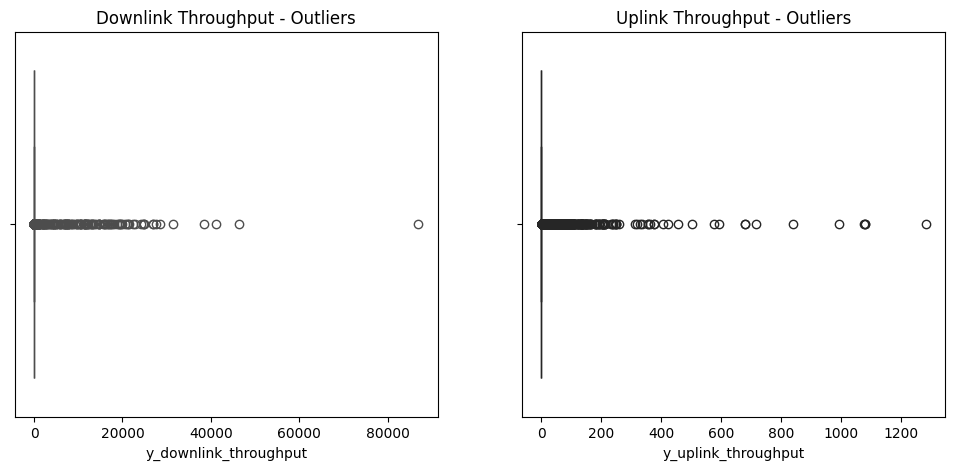

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=df['y_downlink_throughput'], ax=axes[0], color='blue')
axes[0].set_title("Downlink Throughput - Outliers")
sns.boxplot(x=df['y_uplink_throughput'], ax=axes[1], color='green')
axes[1].set_title("Uplink Throughput - Outliers")
plt.show()

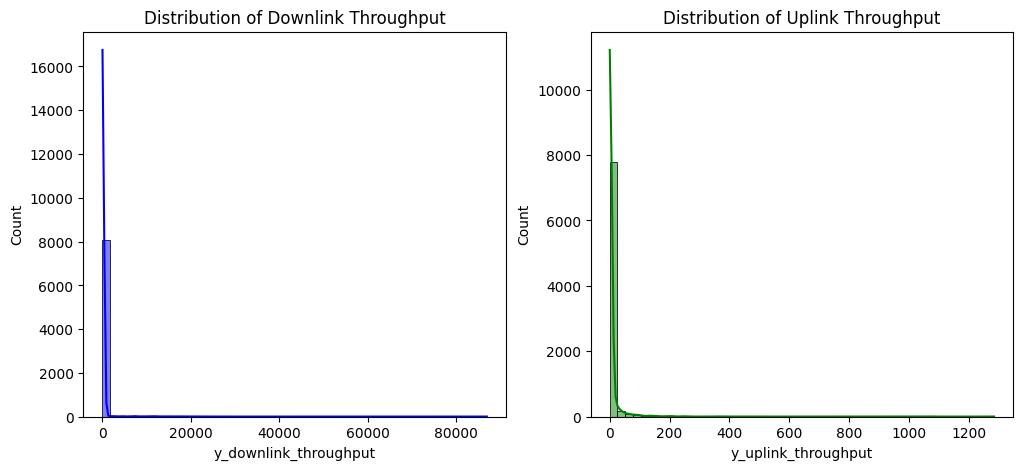

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['y_downlink_throughput'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Downlink Throughput")

sns.histplot(df['y_uplink_throughput'], bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Uplink Throughput")
plt.show()


In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
corr_matrix = df[num_cols].corr()

print("Correlation with Targets")
print(corr_matrix[Targets].sort_values(by="y_downlink_throughput", ascending=False).head(10))

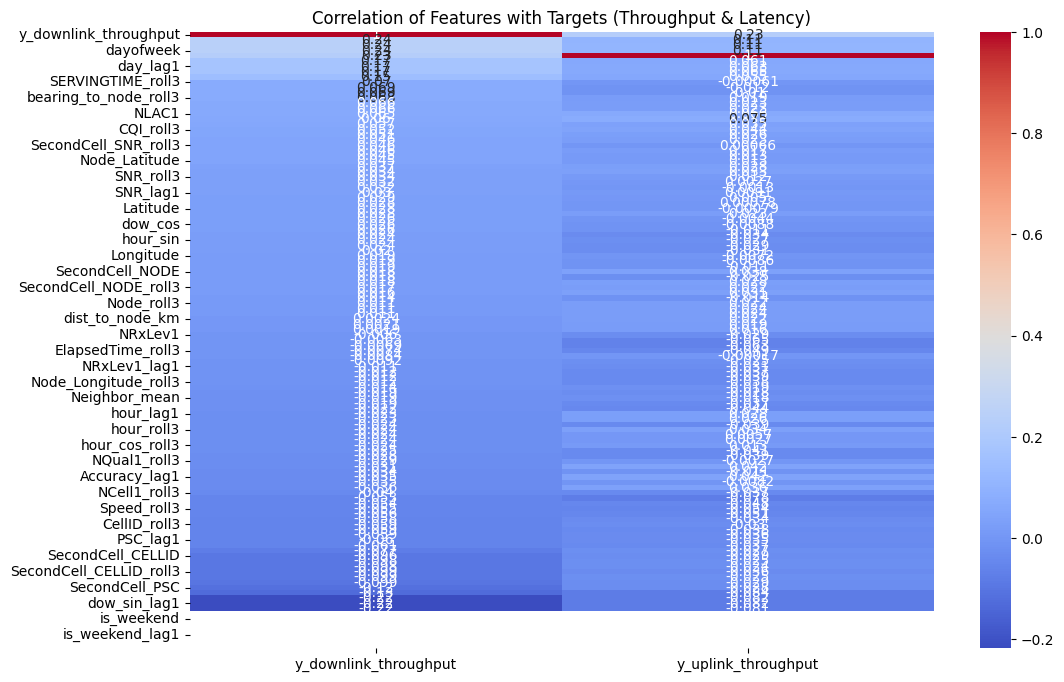

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr[Targets].sort_values(by='y_downlink_throughput', ascending=False),
            annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation of Features Throughput")
plt.show()


In [ ]:
features_to_check = ['Level','SNR','CQI','Qual','Speed','BANDWIDTH']

for col in features_to_check:
    if col in df.columns:
        for target in Targets:
            plt.figure(figsize=(6,4))
            sns.scatterplot(data=df, x=col, y=target, alpha=0.3)
            plt.title(f"{target} vs {col}")
            plt.show()

In [ ]:
if 'ElapsedTime' in df.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='ElapsedTime', y='y_downlink_throughput', label='Downlink')
    sns.lineplot(data=df, x='ElapsedTime', y='y_uplink_throughput', label='Uplink')
    plt.title("Throughput Over Elapsed Time")
    plt.legend()
    plt.show()
    

In [ ]:
if 'Longitude' in df.columns and 'Latitude' in df.columns:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=df, x='Longitude', y='Latitude',
                    hue='y_downlink_throughput', palette='viridis', alpha=0.5)
    plt.title("Geospatial Distribution of Downlink Throughput")
    plt.show()
    # plt.figure(figsize=(10,7))
    # sns.scatterplot(data=df, x='Longitude', y='Latitude',
    #                 hue='PINGAVG', palette='coolwarm', alpha=0.5)
    # plt.title("Geospatial Distribution of Latency")
    # plt.show()


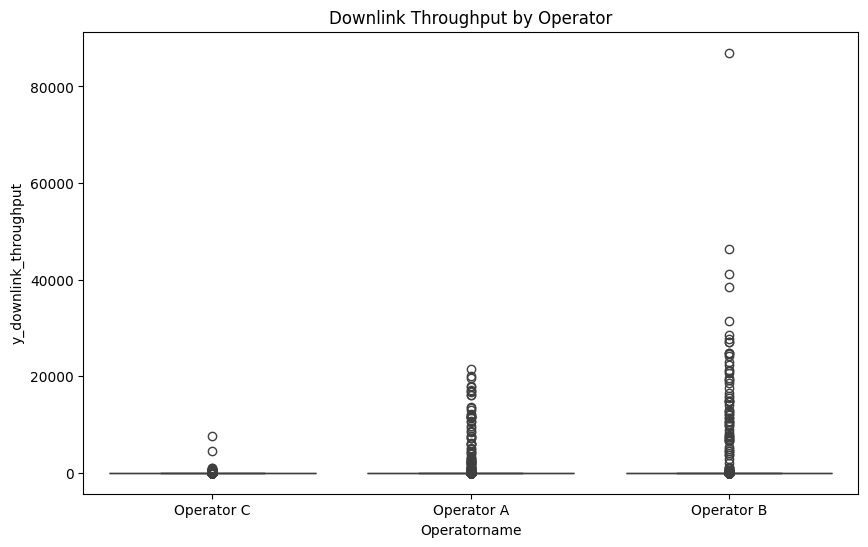

In [33]:
if 'Operatorname' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='Operatorname', y='y_downlink_throughput')
    plt.title("Downlink Throughput by Operator")
    plt.show()

    # plt.figure(figsize=(10,6))
    # sns.boxplot(data=df, x='Operatorname', y='PINGAVG')
    # plt.title("Latency by Operator")
    # plt.show()


In [ ]:
if 'NetworkTech' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='NetworkTech', y='y_downlink_throughput')
    plt.title("Downlink Throughput by Network Tech")
    plt.show()

    # plt.figure(figsize=(10,6))
    # sns.boxplot(data=df, x='NetworkTech', y='PINGAVG')
    # plt.title("Latency by Network Tech")
    # plt.show()


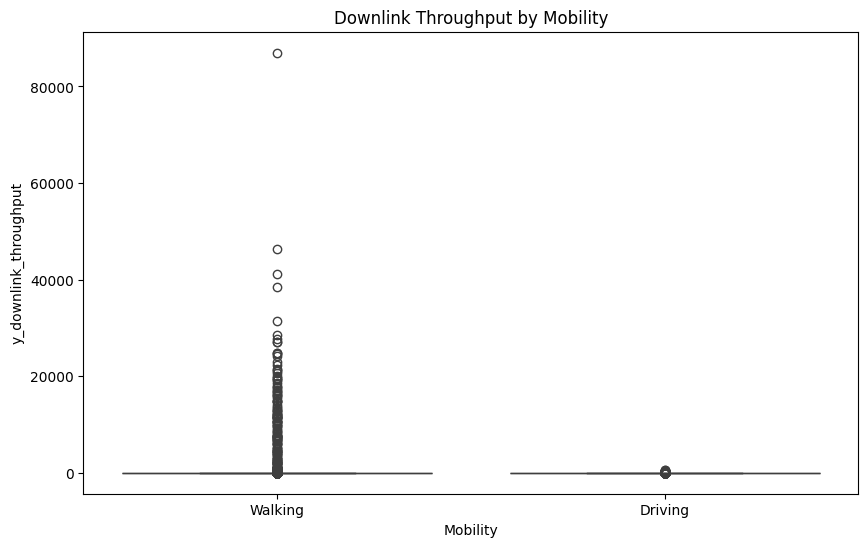

In [32]:

if 'Mobility' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='Mobility', y='y_downlink_throughput')
    plt.title("Downlink Throughput by Mobility")
    plt.show()

    # plt.figure(figsize=(10,6))
    # sns.boxplot(data=df, x='Mobility', y='PINGAVG')
    # plt.title("Latency by Mobility")
    # plt.show()

In [30]:
if 'NetworkTech' in df.columns:
    print("Avg Throughput & Latency by NetworkTech")
    print(df.groupby('NetworkTech')[Targets].mean().round(2))

if 'Operatorname' in df.columns:
    print("Avg Throughput & Latency by Operator")
    print(df.groupby('Operatorname')[Targets].mean().round(2))

if 'Mobility' in df.columns:
    print("Avg Throughput & Latency by Mobility ")
    print(df.groupby('Mobility')[Targets].mean().round(2))

Avg Throughput & Latency by NetworkTech
             y_downlink_throughput  y_uplink_throughput
NetworkTech                                            
4G                           48.16                 2.83
5G                          354.72                 9.90
Avg Throughput & Latency by Operator
              y_downlink_throughput  y_uplink_throughput
Operatorname                                            
Operator A                   191.30                 6.08
Operator B                   350.05                 5.68
Operator C                    17.76                 6.96
Avg Throughput & Latency by Mobility 
          y_downlink_throughput  y_uplink_throughput
Mobility                                            
Driving                    3.87                 3.47
Walking                  277.77                 7.40
